# Text on Graph
Here we will take the example of US birth data and will plot no top of that

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [17]:
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")

In [8]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [10]:
quartiles = np.percentile(births['births'], [25,50,75])

In [11]:
quartiles

array([4358. , 4814. , 5289.5])

In [12]:
mu, sigma = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])

In [18]:
births = births[ (births['births'] > mu - 5 * sigma) & (births['births'] < mu + 5 * sigma) ]

In [19]:
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [25]:
births.index = pd.to_datetime( births.year * 10000 + births.month * 100 + births.day, format= "%Y%m%d" )

In [26]:
births

,year,month,day,gender,births
1969-01-01,1969,1,1.0,F,4046
1969-01-01,1969,1,1.0,M,4440
1969-01-02,1969,1,2.0,F,4454
1969-01-02,1969,1,2.0,M,4548
1969-01-03,1969,1,3.0,F,4548
...,...,...,...,...,...
1988-12-29,1988,12,29.0,M,5944
1988-12-30,1988,12,30.0,F,5742
1988-12-30,1988,12,30.0,M,6095
1988-12-31,1988,12,31.0,F,4435


In [29]:
births.dtypes

year        int64
month       int64
day       float64
gender     object
births      int64
dtype: object

### Making a Temp year so that we can plot the data monthly

In [39]:
bydate = births.pivot_table("births", [births.index.month, births.index.day])

In [40]:
bydate

births
1  1   4009.225
   2   4247.400
   3   4500.900
   4   4571.350
   5   4603.625
...         ...
12 27  4850.150
   28  5044.200
   29  5120.150
   30  5172.350
   31  4859.200

[366 rows x 1 columns]

<AxesSubplot:>

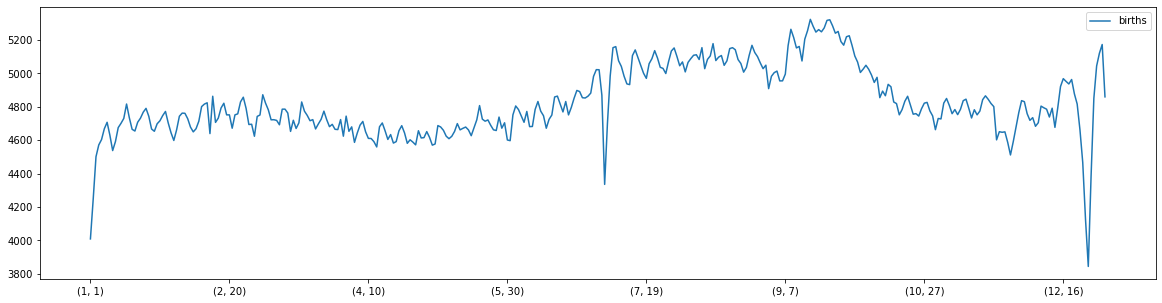

In [52]:
bydate.plot(figsize= (20,5))

### As you can see the X axes are note properly defined...

In [42]:
bydate.index

MultiIndex([( 1,  1),
            ( 1,  2),
            ( 1,  3),
            ( 1,  4),
            ( 1,  5),
            ( 1,  6),
            ( 1,  7),
            ( 1,  8),
            ( 1,  9),
            ( 1, 10),
            ...
            (12, 22),
            (12, 23),
            (12, 24),
            (12, 25),
            (12, 26),
            (12, 27),
            (12, 28),
            (12, 29),
            (12, 30),
            (12, 31)],
           length=366)

In [59]:
from datetime import datetime

In [61]:
bydate.index = [datetime(2012, month, day) for month, day in bydate.index]

<AxesSubplot:>

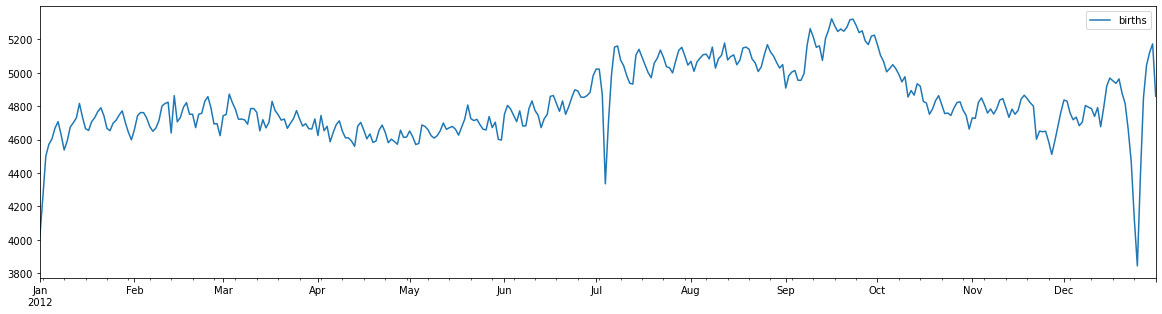

In [64]:
bydate.plot(figsize= (20,5))

### It was like a repeating task from the previous notebook...
Let's do the *Actual* work 

Text(2012-1-1, 3950, 'New Year')

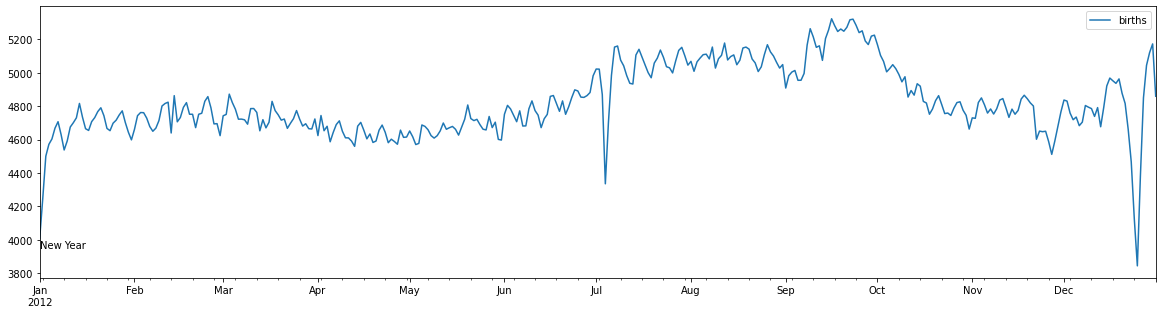

In [68]:
fig, ax = plt.subplots(figsize= (20, 5))
bydate.plot(ax = ax)

ax.text('2012-1-1', 3950, "New Year")

Text(2012-12-25, 3950, 'New Year')

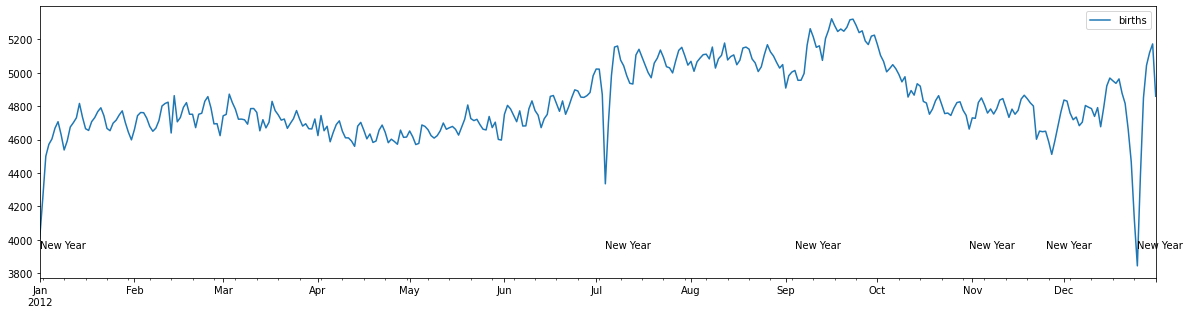

In [72]:
fig, ax = plt.subplots(figsize= (20, 5))
bydate.plot(ax = ax)

ax.text('2012-1-1', 3950, "New Year")
ax.text('2012-7-4', 3950, "New Year")
ax.text('2012-9-4', 3950, "New Year")
ax.text('2012-10-31', 3950, "New Year")
ax.text('2012-11-25', 3950, "New Year")
ax.text('2012-12-25', 3950, "New Year")

Text(2012-12-25, 3850, 'Christmas')

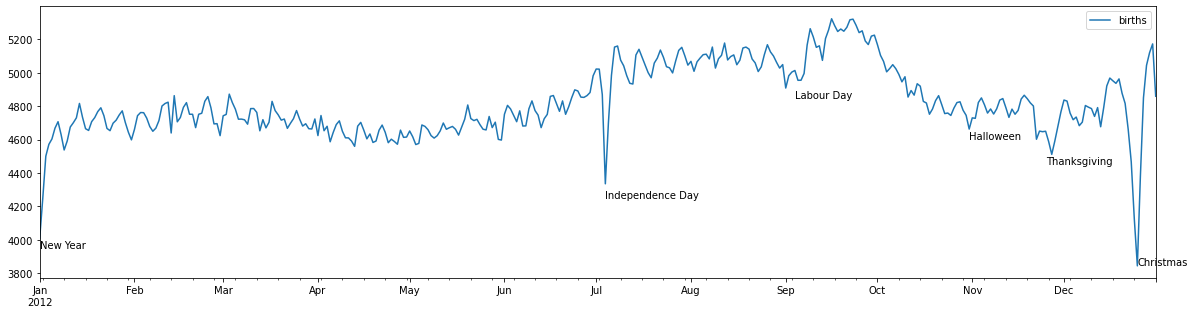

In [74]:
fig, ax = plt.subplots(figsize= (20, 5))
bydate.plot(ax = ax)

ax.text('2012-1-1', 3950, "New Year")
ax.text('2012-7-4', 4250, "Independence Day")
ax.text('2012-9-4', 4850, "Labour Day")
ax.text('2012-10-31', 4600, "Halloween")
ax.text('2012-11-25', 4450, "Thanksgiving")
ax.text('2012-12-25', 3850, "Christmas")

### Overlapping... 

Text(2012-12-25, 3850, 'Christmas')

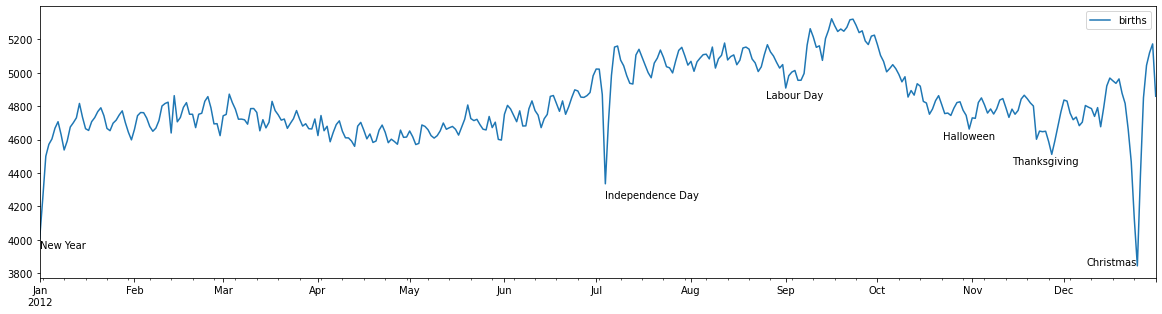

In [77]:
fig, ax = plt.subplots(figsize= (20, 5))
bydate.plot(ax = ax)

ax.text('2012-1-1', 3950, "New Year")
ax.text('2012-7-4', 4250, "Independence Day")
ax.text('2012-9-4', 4850, "Labour Day", ha= 'center')
ax.text('2012-10-31', 4600, "Halloween", ha= 'center')
ax.text('2012-11-25', 4450, "Thanksgiving", ha= 'center')
ax.text('2012-12-25', 3850, "Christmas", ha= 'right')

[Text(0.5, 1.0, 'USA Births data'), Text(0, 0.5, 'Average')]

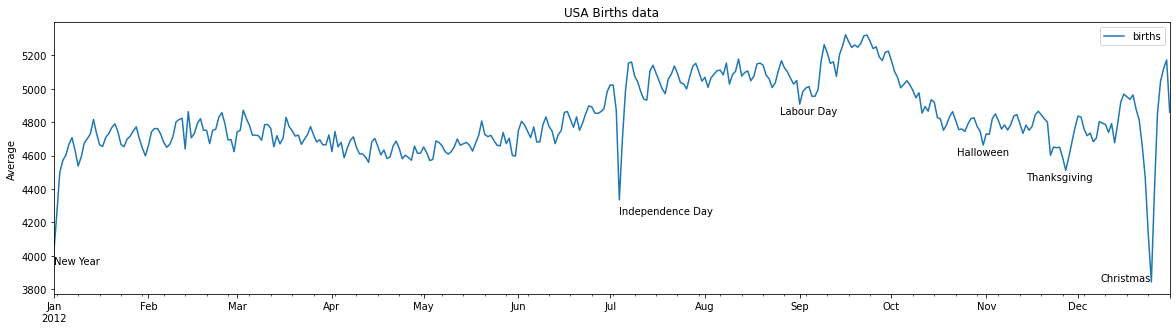

In [79]:
fig, ax = plt.subplots(figsize= (20, 5))
bydate.plot(ax = ax)

ax.text('2012-1-1', 3950, "New Year")
ax.text('2012-7-4', 4250, "Independence Day")
ax.text('2012-9-4', 4850, "Labour Day", ha= 'center')
ax.text('2012-10-31', 4600, "Halloween", ha= 'center')
ax.text('2012-11-25', 4450, "Thanksgiving", ha= 'center')
ax.text('2012-12-25', 3850, "Christmas", ha= 'right')

ax.set(title= "USA Births data",
      ylabel= "Average")

In [81]:
import matplotlib as mpl

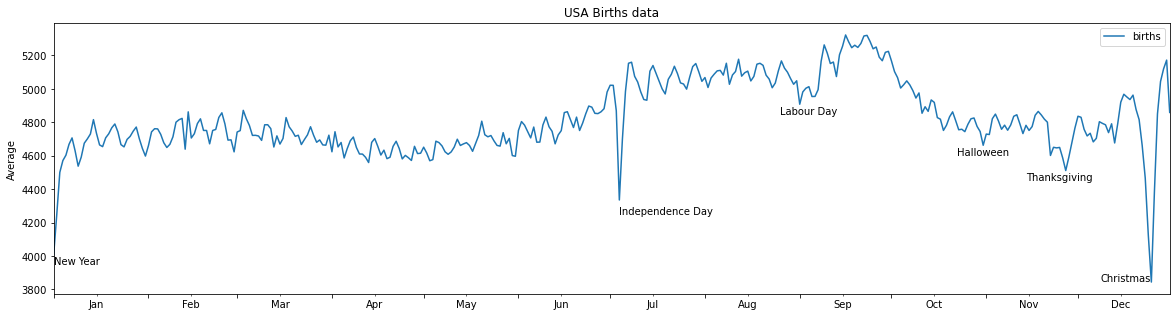

In [89]:
fig, ax = plt.subplots(figsize= (20, 5))
bydate.plot(ax = ax)

ax.text('2012-1-1', 3950, "New Year")
ax.text('2012-7-4', 4250, "Independence Day")
ax.text('2012-9-4', 4850, "Labour Day", ha= 'center')
ax.text('2012-10-31', 4600, "Halloween", ha= 'center')
ax.text('2012-11-25', 4450, "Thanksgiving", ha= 'center')
ax.text('2012-12-25', 3850, "Christmas", ha= 'right')

ax.set(title= "USA Births data",
      ylabel= "Average")

ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday = 15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));



#### See the ticks? Between two months? They are in between because of `bymonthday = 15`